In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv('churn.csv', skipinitialspace=True)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
#check how many categories for each columns
for x in df.columns:
    print(x, len(df[x].unique()))

RowNumber 10000
CustomerId 10000
Surname 2932
CreditScore 460
Geography 3
Gender 2
Age 70
Tenure 11
Balance 6382
NumOfProducts 4
HasCrCard 2
IsActiveMember 2
EstimatedSalary 9999
Exited 2


In [4]:
# selecting feature
# based on Information Theory, i exclude 
exclude = ['RowNumber', 'CustomerId', 'Surname']
for column in df.columns:
    for exc in exclude:
        if exc == column:
            print(exc, '=', column, '-> deleting...')
            df.drop([column], axis=1, inplace=True)
        else:
            continue
df

RowNumber = RowNumber -> deleting...
CustomerId = CustomerId -> deleting...
Surname = Surname -> deleting...


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [5]:
# since sklearn can only process cateoprical integer
# let's get dummies
df = pd.get_dummies(data= df, columns=['Gender', 'Geography'])
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Female,Gender_Male,Geography_France,Geography_Germany,Geography_Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [6]:
df.rename(columns={'Gender_Female':'Female', 'Gender_Male':'Male',
                   'Geography_France':'France', 'Geography_Germany':'Germany',
                  'Geography_Spain':'Spain'}, inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1,1,0,0
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1,1,0,0
9997,709,36,7,0.00,1,0,1,42085.58,1,1,0,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1,0,1,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Age              10000 non-null  int64  
 2   Tenure           10000 non-null  int64  
 3   Balance          10000 non-null  float64
 4   NumOfProducts    10000 non-null  int64  
 5   HasCrCard        10000 non-null  int64  
 6   IsActiveMember   10000 non-null  int64  
 7   EstimatedSalary  10000 non-null  float64
 8   Exited           10000 non-null  int64  
 9   Female           10000 non-null  uint8  
 10  Male             10000 non-null  uint8  
 11  France           10000 non-null  uint8  
 12  Germany          10000 non-null  uint8  
 13  Spain            10000 non-null  uint8  
dtypes: float64(2), int64(7), uint8(5)
memory usage: 752.0 KB


In [8]:
#DecTree can handle missing value & robust to outlier
#df.isnull().sum()

In [9]:
from sklearn.model_selection import train_test_split

x = df.drop(columns='Exited')
y = df['Exited']

print(x.shape)
print(y.shape)

(10000, 13)
(10000,)


In [10]:
# splitting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y, random_state=42)

In [11]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(6700, 13)
(3300, 13)
(6700,)
(3300,)


In [12]:
model = DecisionTreeClassifier(max_depth=3) #soon parameter tunning. by default, its gini impurity
model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [13]:
# visualize tree
import matplotlib.pyplot as plt
from sklearn import tree

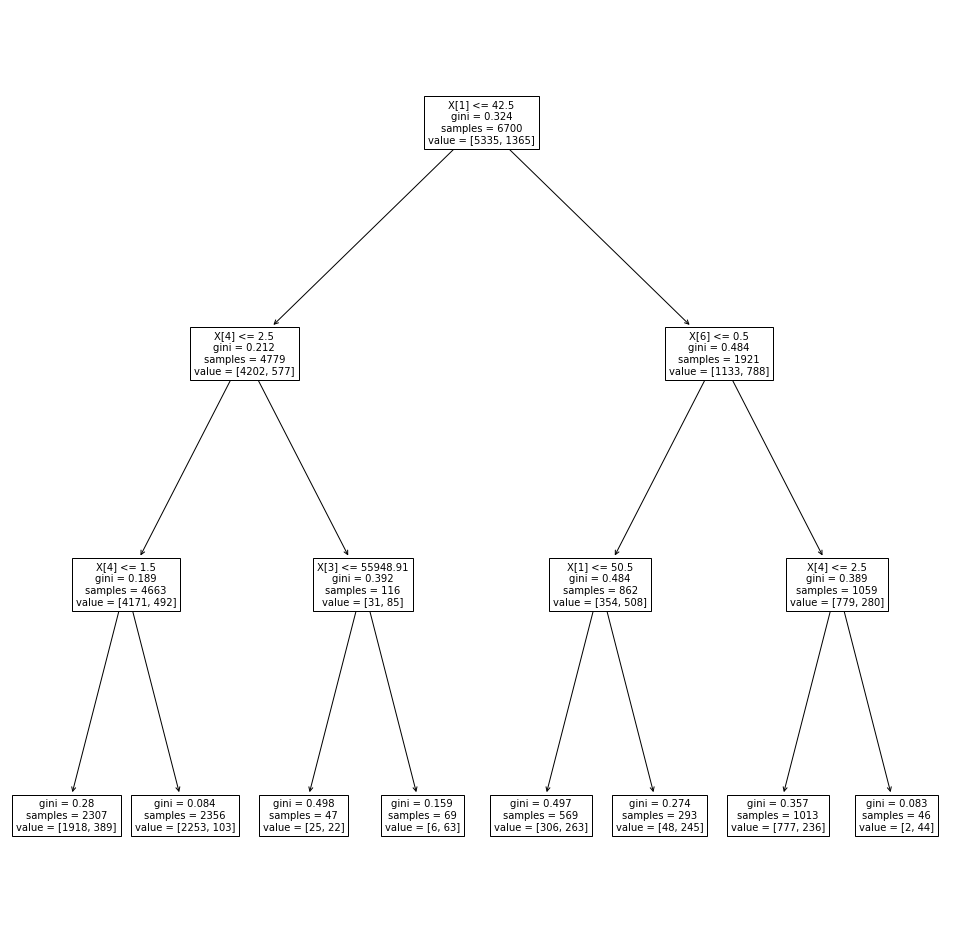

In [14]:
plt.subplots(figsize=(17,17))
tree.plot_tree(model, fontsize=10)
plt.show()

In [27]:
from sklearn.metrics import accuracy_score
y_pred = model.predict(x_test)
accuracy_score(y_test, y_pred)

0.8387878787878787

In [28]:
# cross val splitting
from sklearn.model_selection import cross_val_score


In [29]:
cv = cross_val_score(model, x, y, cv=5)
cv

array([0.836 , 0.8435, 0.835 , 0.8445, 0.8365])

In [30]:
cv.mean()

0.8391

In [35]:
# model evaluation
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2628
           1       0.88      0.24      0.38       672

    accuracy                           0.84      3300
   macro avg       0.86      0.62      0.64      3300
weighted avg       0.85      0.84      0.80      3300



In [38]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2606,   22],
       [ 510,  162]], dtype=int64)

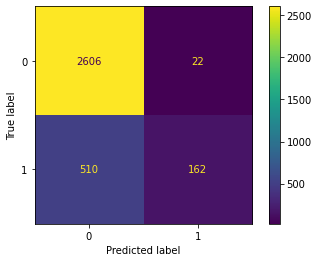

In [39]:
display = ConfusionMatrixDisplay(cm, display_labels=model.classes_).plot()

In [20]:
#model improvement